# 신규 아파트 주차 수요 예측

# 탐색적 데이터 분석

## [미션]

단계1 에서 생성한 데이터에 대해서 탐색적 분석을 수행합니다.

1) 단변량 분석
    - 숫자형, 범주형 변수에 맞게 데이터를 탐색하며 비즈니스적 의미를 파악합니다.
2) 이변량 분석
    - 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
    - 범주형 변수 → 실차량수 관계를 분석합니다.
3) 전처리(추가)
    - 범주형 변수 중에는 범줏값 개수가 적은 범주들은 유사한 범주끼리 묶어 봅니다.
    - 불필요한 변수를 제거합니다.

## 1. 환경설정

In [8]:
# 기본 경로
path = ''

### 구글 콜랩 수행

In [10]:
# 구글 드라이브 연결, 패스 지정
import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    path = '/content/drive/MyDrive/project/'

### 라이브러리 불러오기

In [14]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import scipy.stats as spst

import joblib
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

### 데이터 불러오기

- joblib.dump() 함수를 사용해 이전에 저장했던 base_data1.pkl 파일을 읽어옵니다.
- 읽어온 데이터를 apart 데이터프레임으로 선언합니다.

#### 1) 데이터 불러오기

In [17]:
# 파일 불러오기
apart = joblib.load(path+'base_data1.pkl')

#### 2) 기본 정보 조회

In [19]:
apart.head(3)

,단지코드,총세대수,지역,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,10-30,30-40,40-50,50-60,60-70,70-80,80-200,임대보증금,임대료
0,C0001,78,서울,2013,계단식,개별가스난방,전체동 설치,109,6023.7683,0,0,0,78,0,0,0,56962000.0,642930.0
1,C0002,35,서울,2013,복도식,개별가스난방,전체동 설치,35,1569.1668,35,0,0,0,0,0,0,63062000.0,470100.0
2,C0003,88,서울,2013,계단식,개별가스난방,전체동 설치,88,7180.1396,0,0,0,88,0,0,0,72190000.0,586540.0


In [20]:
apart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   단지코드     345 non-null    object 
 1   총세대수     345 non-null    int64  
 2   지역       345 non-null    object 
 3   준공연도     345 non-null    int64  
 4   건물형태     345 non-null    object 
 5   난방방식     345 non-null    object 
 6   승강기설치여부  345 non-null    object 
 7   실차량수     345 non-null    int64  
 8   총면적      345 non-null    float64
 9   10-30    345 non-null    int64  
 10  30-40    345 non-null    int64  
 11  40-50    345 non-null    int64  
 12  50-60    345 non-null    int64  
 13  60-70    345 non-null    int64  
 14  70-80    345 non-null    int64  
 15  80-200   345 non-null    int64  
 16  임대보증금    345 non-null    float64
 17  임대료      345 non-null    float64
dtypes: float64(3), int64(10), object(5)
memory usage: 48.6+ KB


In [21]:
apart.describe()

,총세대수,준공연도,실차량수,총면적,10-30,30-40,40-50,50-60,60-70,70-80,80-200,임대보증금,임대료
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,3.450000e+02,345.000000
mean,546.759420,2007.713043,555.431884,37282.661962,45.837681,169.513043,147.455072,132.889855,1.852174,16.895652,34.515942,2.382737e+07,197729.050210
std,432.359538,7.261036,374.640474,29588.197927,161.133746,222.935074,216.675593,252.947082,32.771294,76.441995,116.975949,2.247481e+07,158760.777669
min,1.000000,1992.000000,21.000000,68.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,178.000000,2003.000000,258.000000,11293.832100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.272491e+07,112905.000000
50%,491.000000,2008.000000,498.000000,32190.360000,0.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.930850e+07,172000.000000
75%,853.000000,2013.000000,822.000000,56189.979600,0.000000,298.000000,264.000000,150.000000,0.000000,0.000000,0.000000,2.837700e+07,227564.000000
max,2289.000000,2022.000000,1657.000000,150126.863200,1181.000000,1429.000000,1258.000000,1444.000000,608.000000,756.000000,850.000000,1.898219e+08,950305.000000


## 2. 기본 분석

- 기술통계정보, 결측치 확인 등 기본 분석을 수행합니다.

In [23]:
apart.isna().sum()

단지코드       0
총세대수       0
지역         0
준공연도       0
건물형태       0
난방방식       0
승강기설치여부    0
실차량수       0
총면적        0
10-30      0
30-40      0
40-50      0
50-60      0
60-70      0
70-80      0
80-200     0
임대보증금      0
임대료        0
dtype: int64

## 3. 단변량 분석

- 주요 변수들을 연속형, 범주형으로 구분하여 데이터 분포를 살펴보며 비즈니스적인 의미를 파악합니다.
    - 연속형: '실차량수', '총세대수', '총면적', '준공연도', '임대료', '임대보증금'
    - 범주형: '지역', '건물형태', '난방방식', '승강기설치여부'
- 전용면적구간은 pd.melt() 함수를 사용해 pivot을 해제한 후 분석합니다.

### (1) 연속형 변수

- 대상: '실차량수', '총세대수', '총면적', '준공연도', '임대료', '임대보증금'
- 기술통계, Histogram, Boxplot 등을 사용해 데이터 분포를 파악합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [26]:
# 함수 만들기
def test(data, col_name) :
    display(data[col_name].describe())

    plt.figure(figsize=(13, 5))

    plt.subplot(121)
    sns.histplot(x=col_name, data = data, kde = True, bins = 20)
    plt.grid()

    plt.subplot(122)
    sns.boxplot(y = data[col_name])
    plt.grid()

    plt.tight_layout()
    plt.show()


#### 1) 실차량수

count     345.000000
mean      555.431884
std       374.640474
min        21.000000
25%       258.000000
50%       498.000000
75%       822.000000
max      1657.000000
Name: 실차량수, dtype: float64

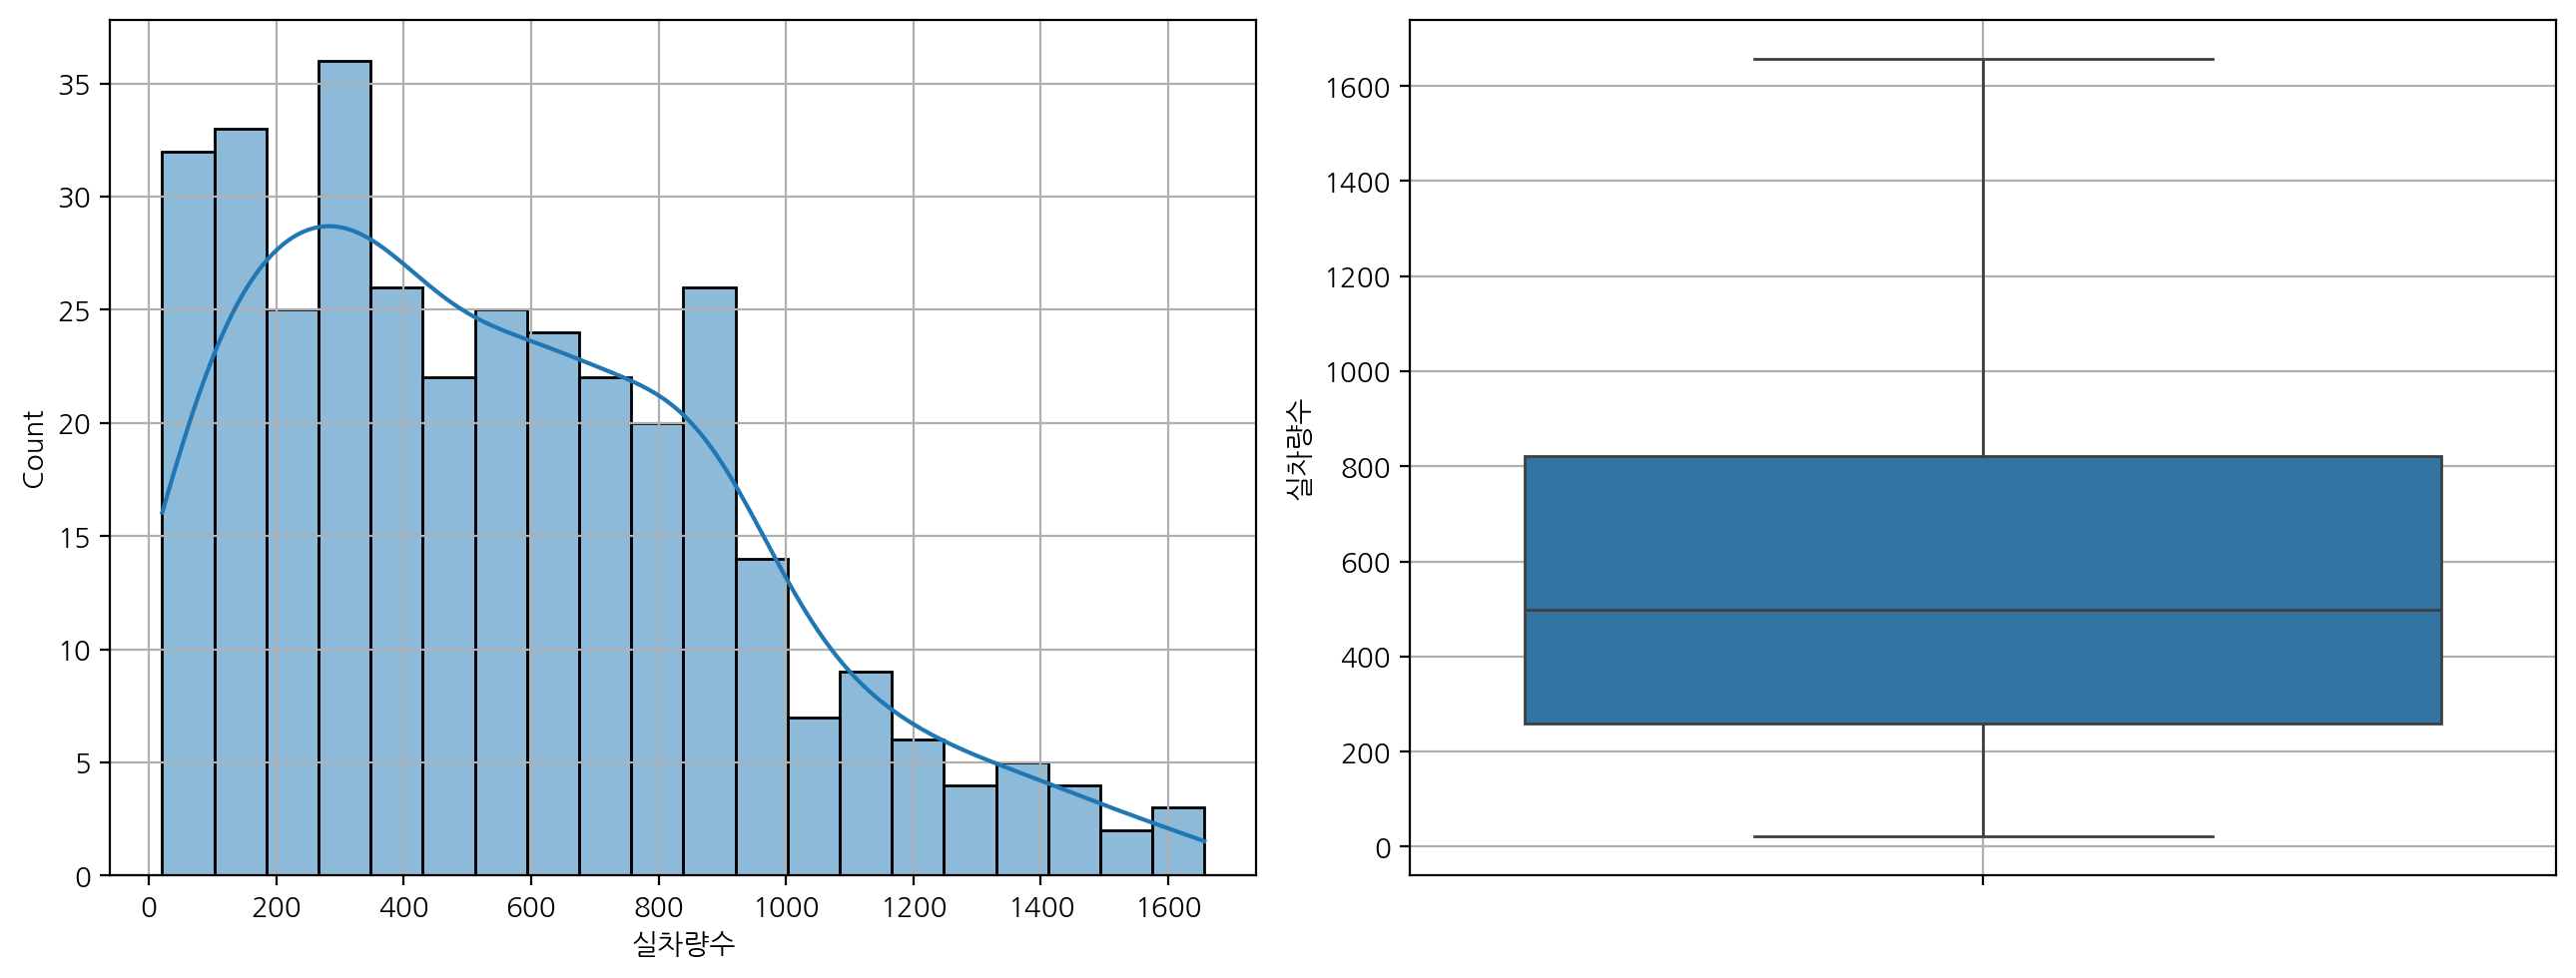

In [28]:
test(apart, '실차량수')

In [ ]:
# 의견
# 대부분 10~800 

#### 2) 총세대수

count     345.000000
mean      546.759420
std       432.359538
min         1.000000
25%       178.000000
50%       491.000000
75%       853.000000
max      2289.000000
Name: 총세대수, dtype: float64

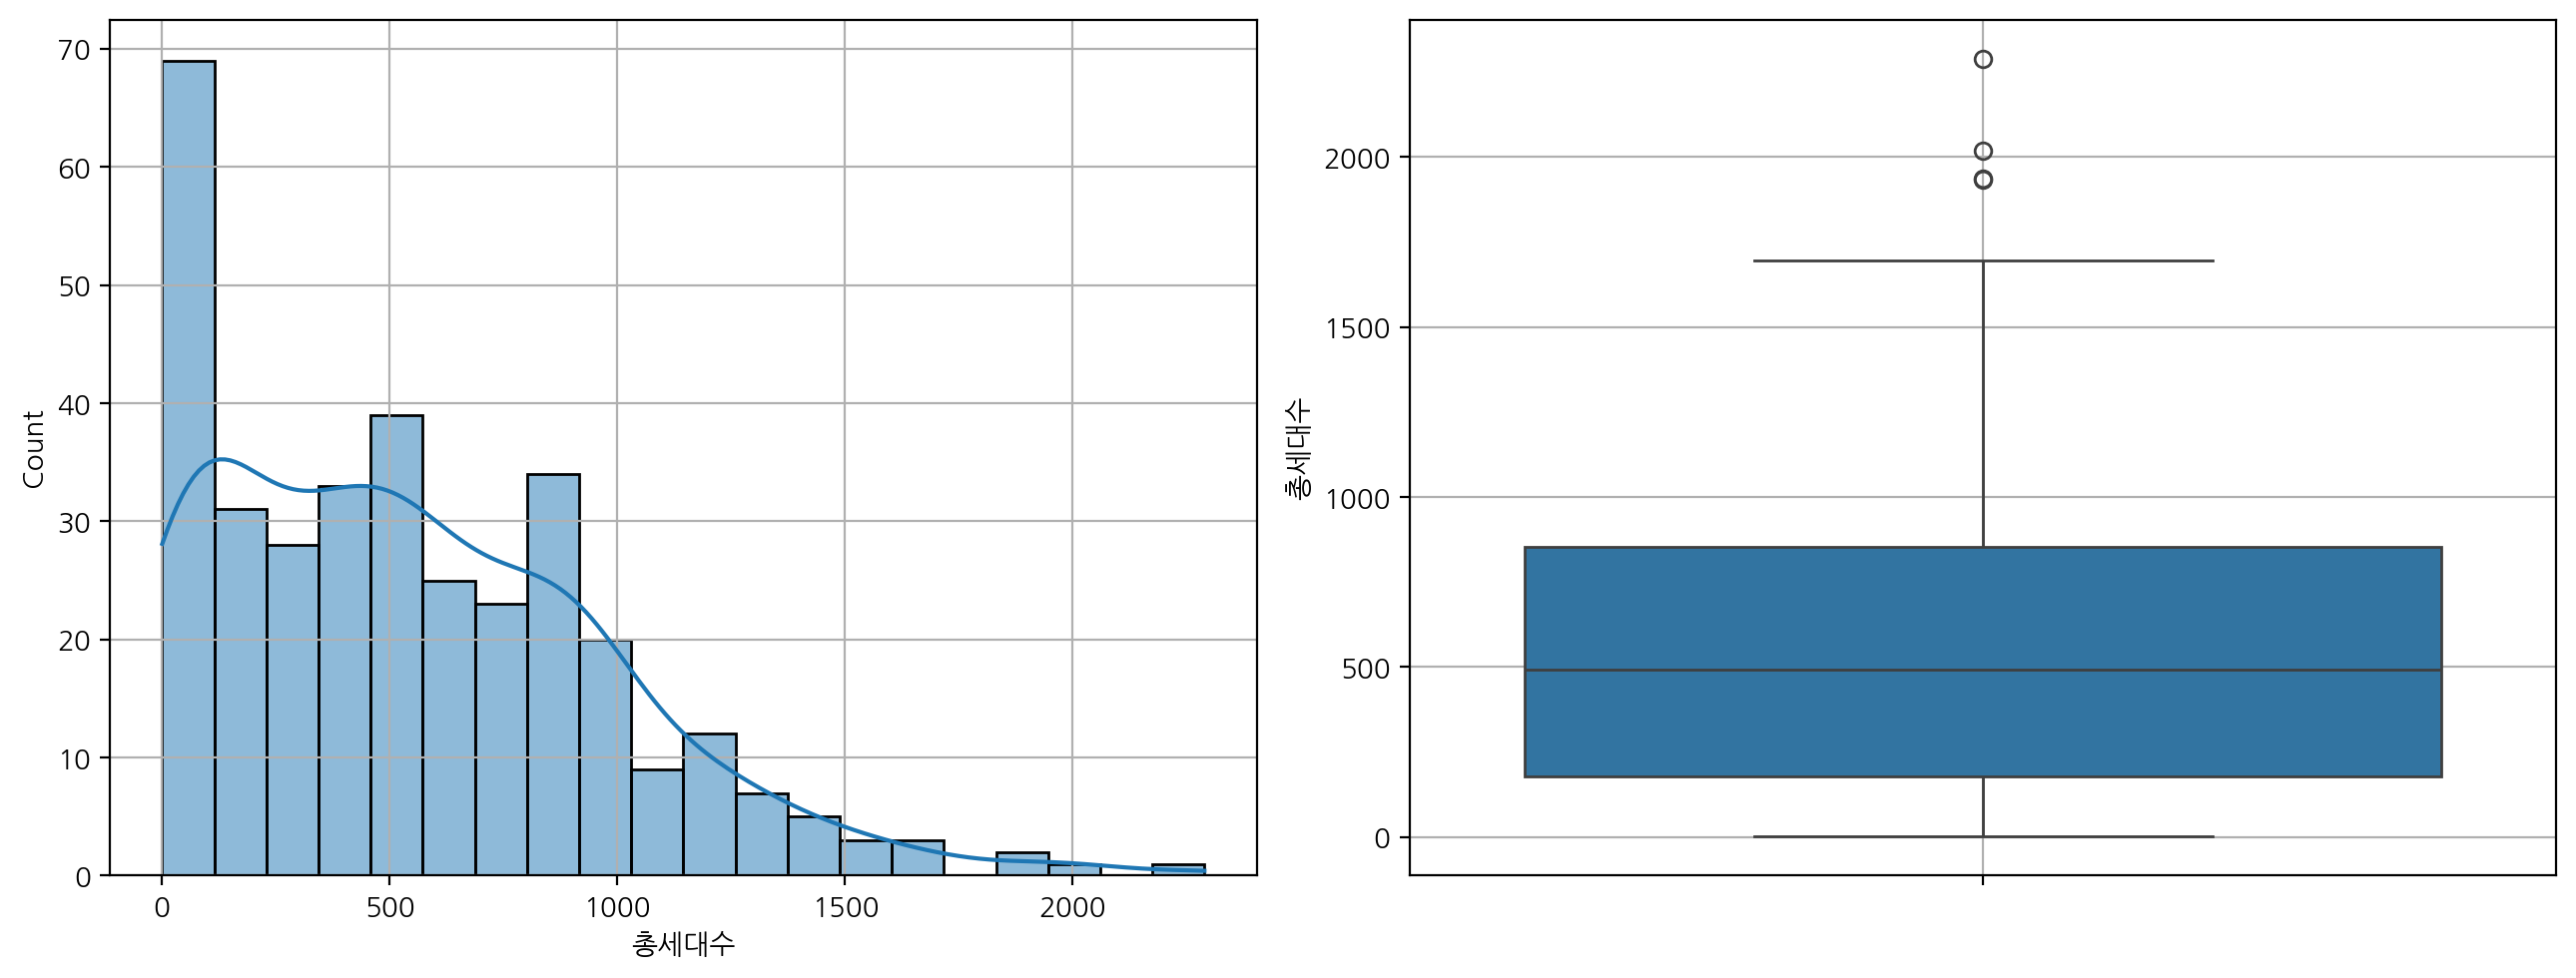

In [30]:
test(apart, '총세대수')

#### 3) 총면적

count       345.000000
mean      37282.661962
std       29588.197927
min          68.930000
25%       11293.832100
50%       32190.360000
75%       56189.979600
max      150126.863200
Name: 총면적, dtype: float64

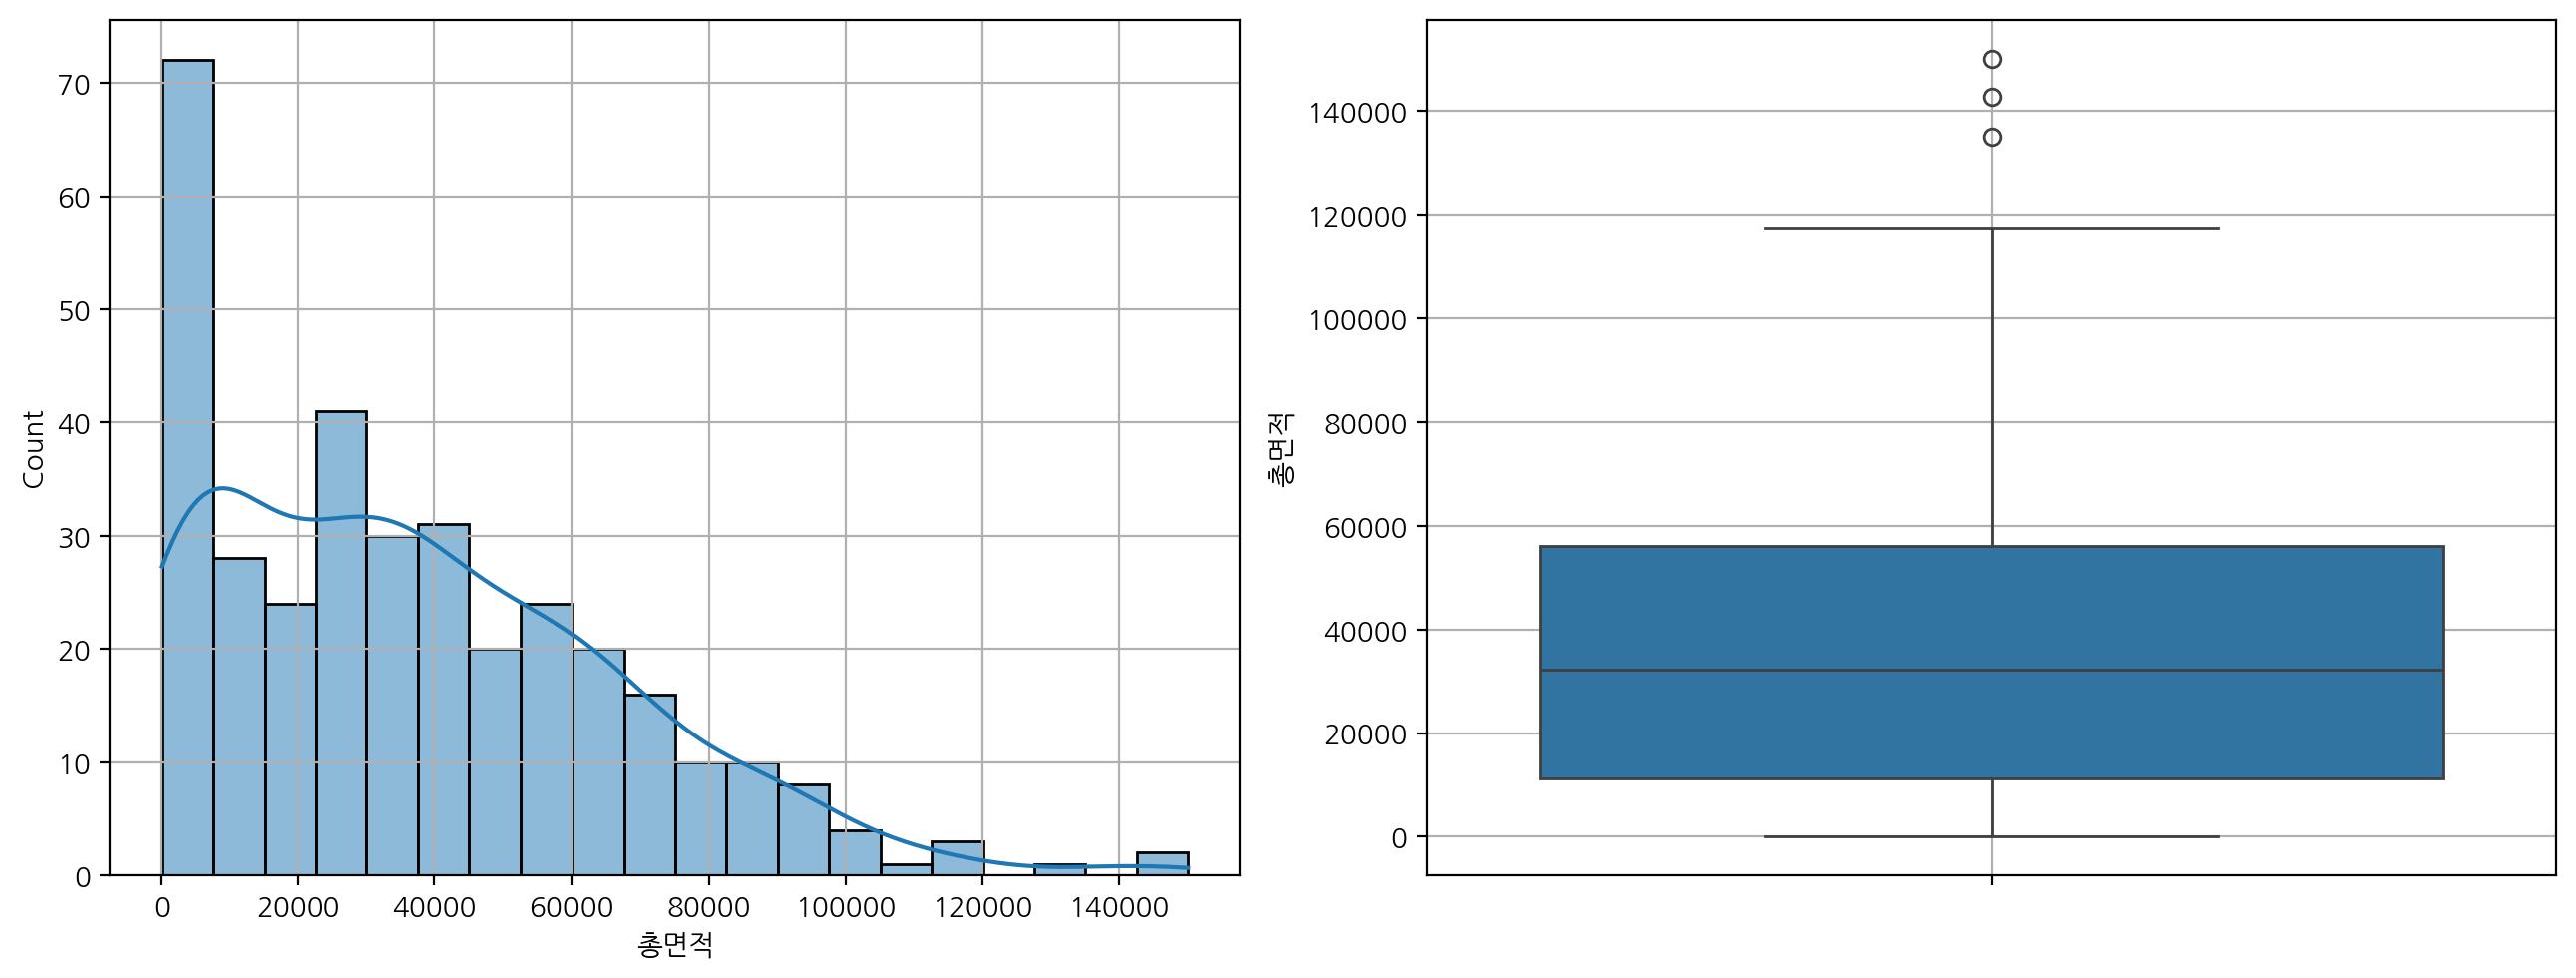

In [32]:
test(apart, '총면적')

#### 4) 준공연도

count     345.000000
mean     2007.713043
std         7.261036
min      1992.000000
25%      2003.000000
50%      2008.000000
75%      2013.000000
max      2022.000000
Name: 준공연도, dtype: float64

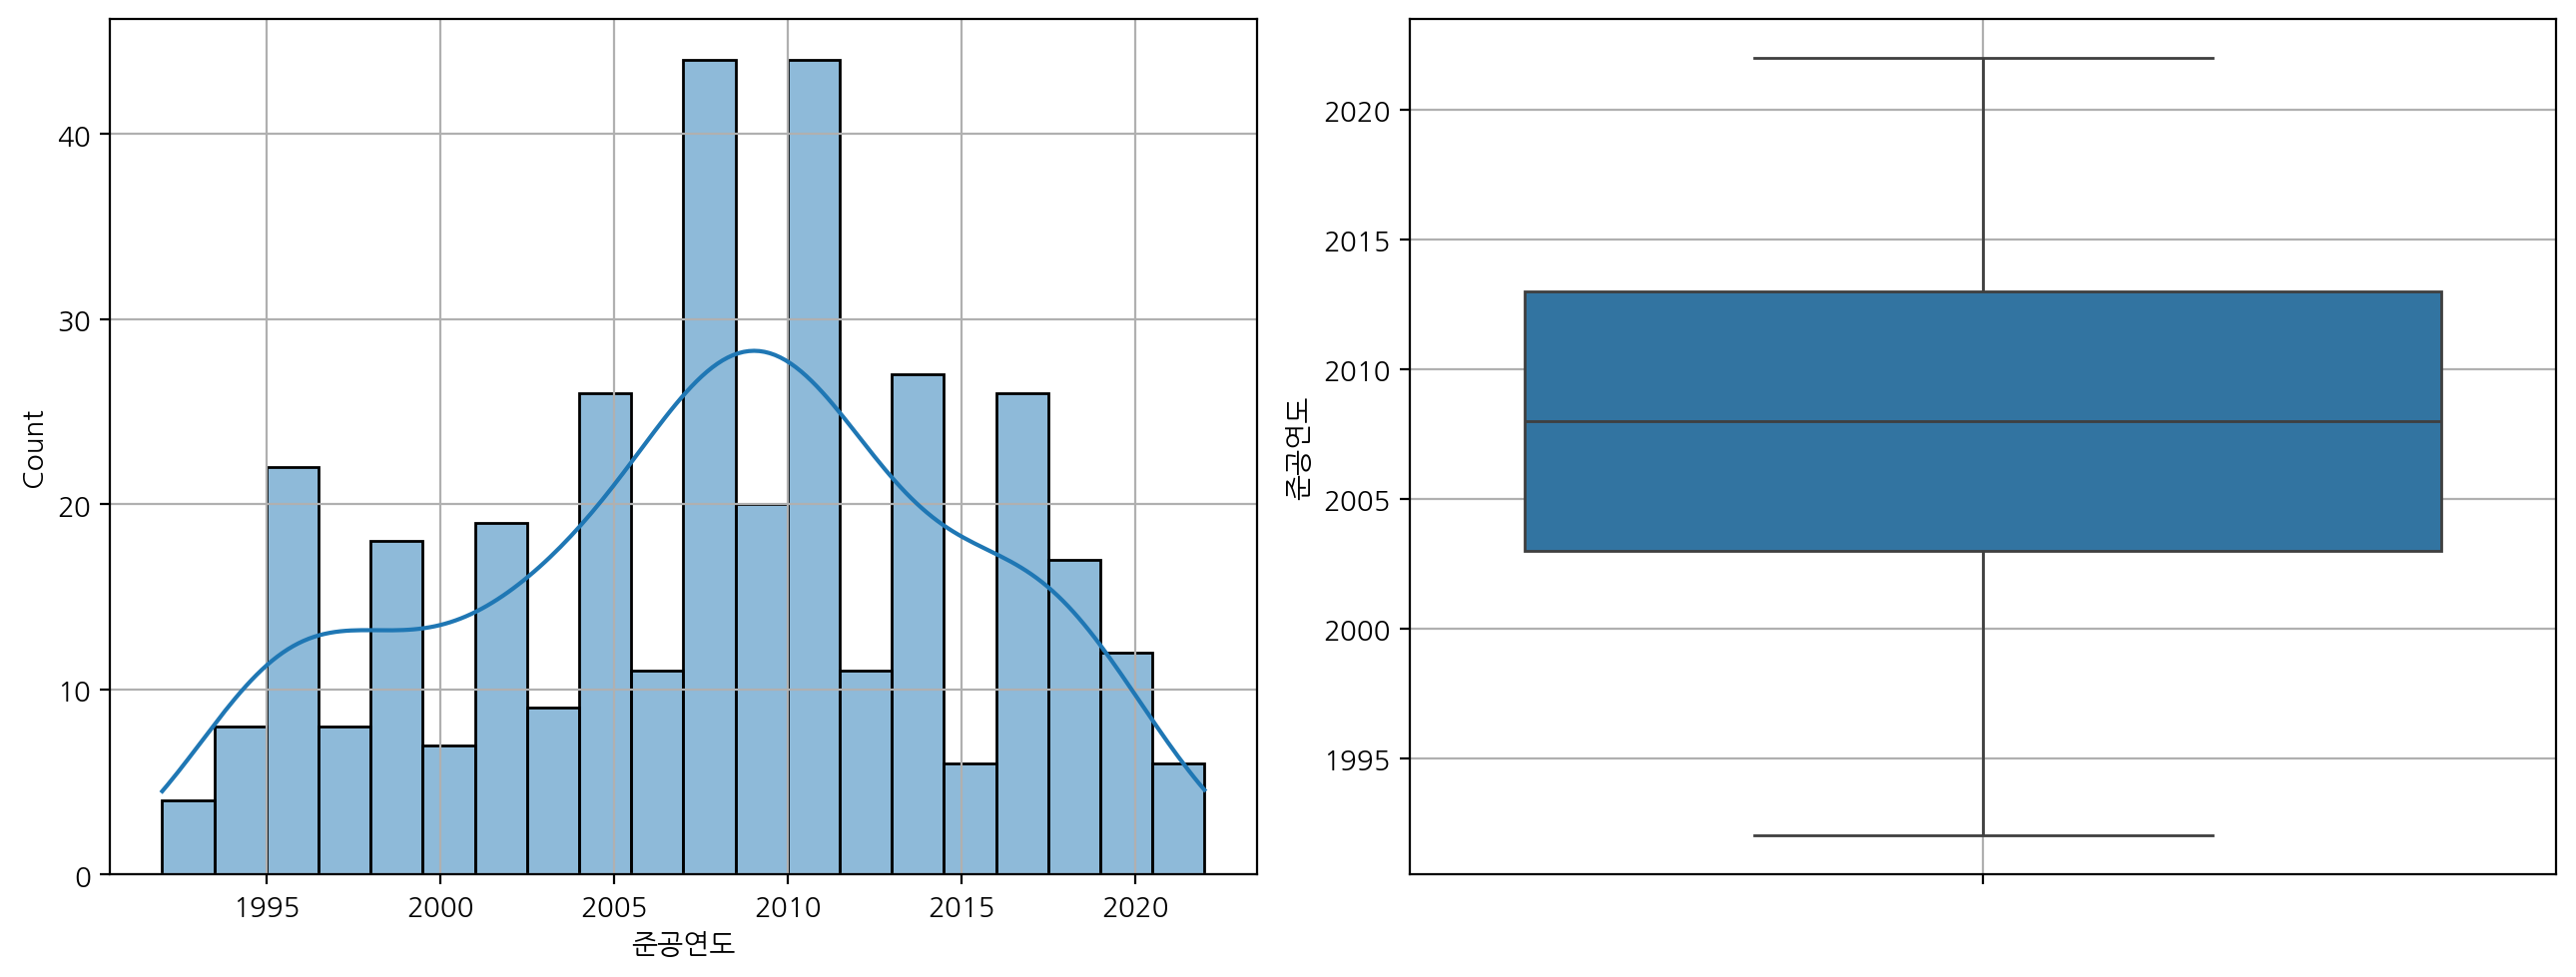

In [34]:
test(apart, '준공연도')

#### 5) 임대료

count       345.000000
mean     197729.050210
std      158760.777669
min           0.000000
25%      112905.000000
50%      172000.000000
75%      227564.000000
max      950305.000000
Name: 임대료, dtype: float64

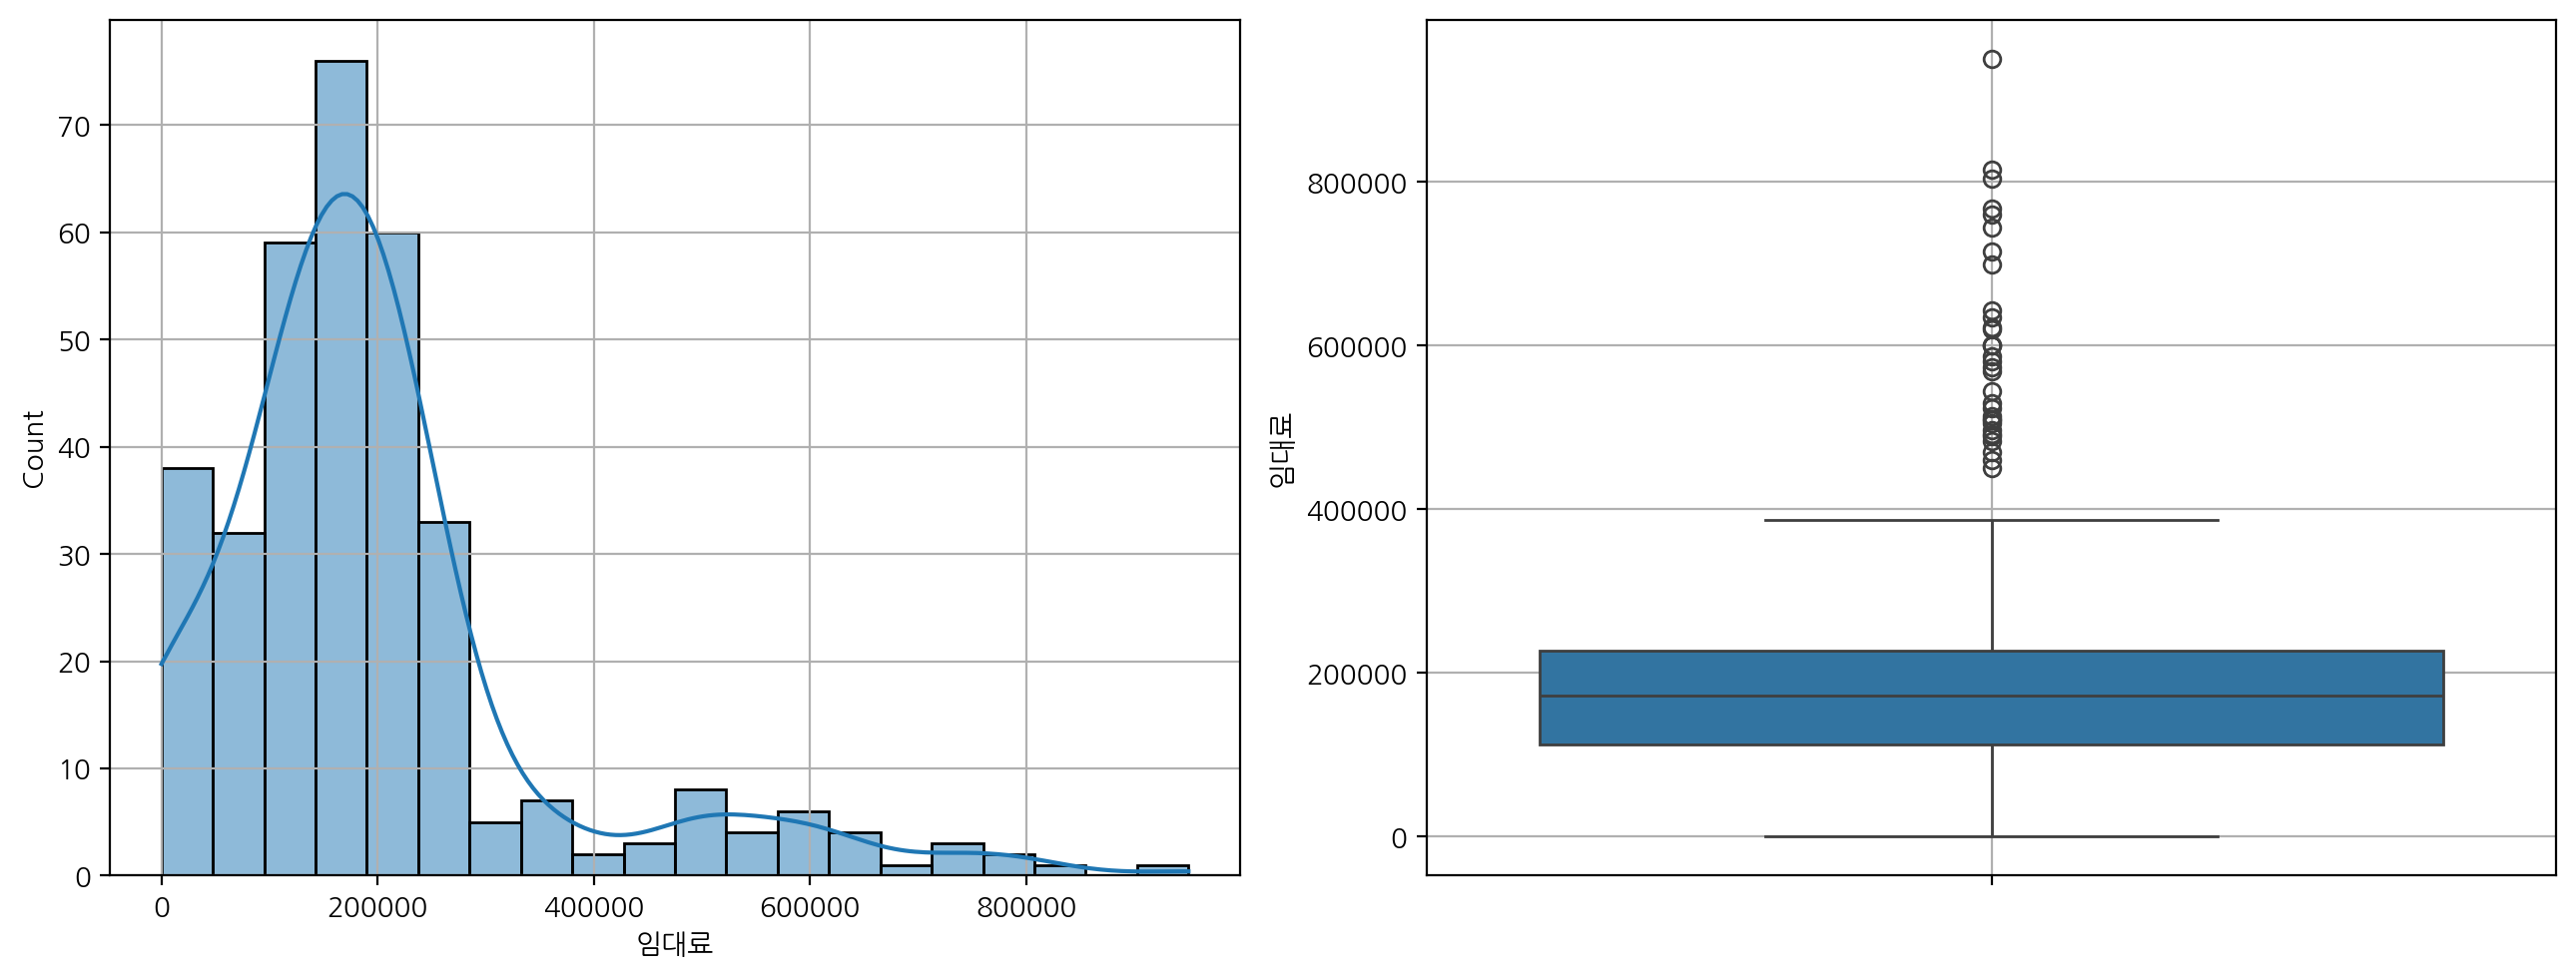

In [36]:
test(apart, '임대료')

#### 6) 임대보증금

count    3.450000e+02
mean     2.382737e+07
std      2.247481e+07
min      0.000000e+00
25%      1.272491e+07
50%      1.930850e+07
75%      2.837700e+07
max      1.898219e+08
Name: 임대보증금, dtype: float64

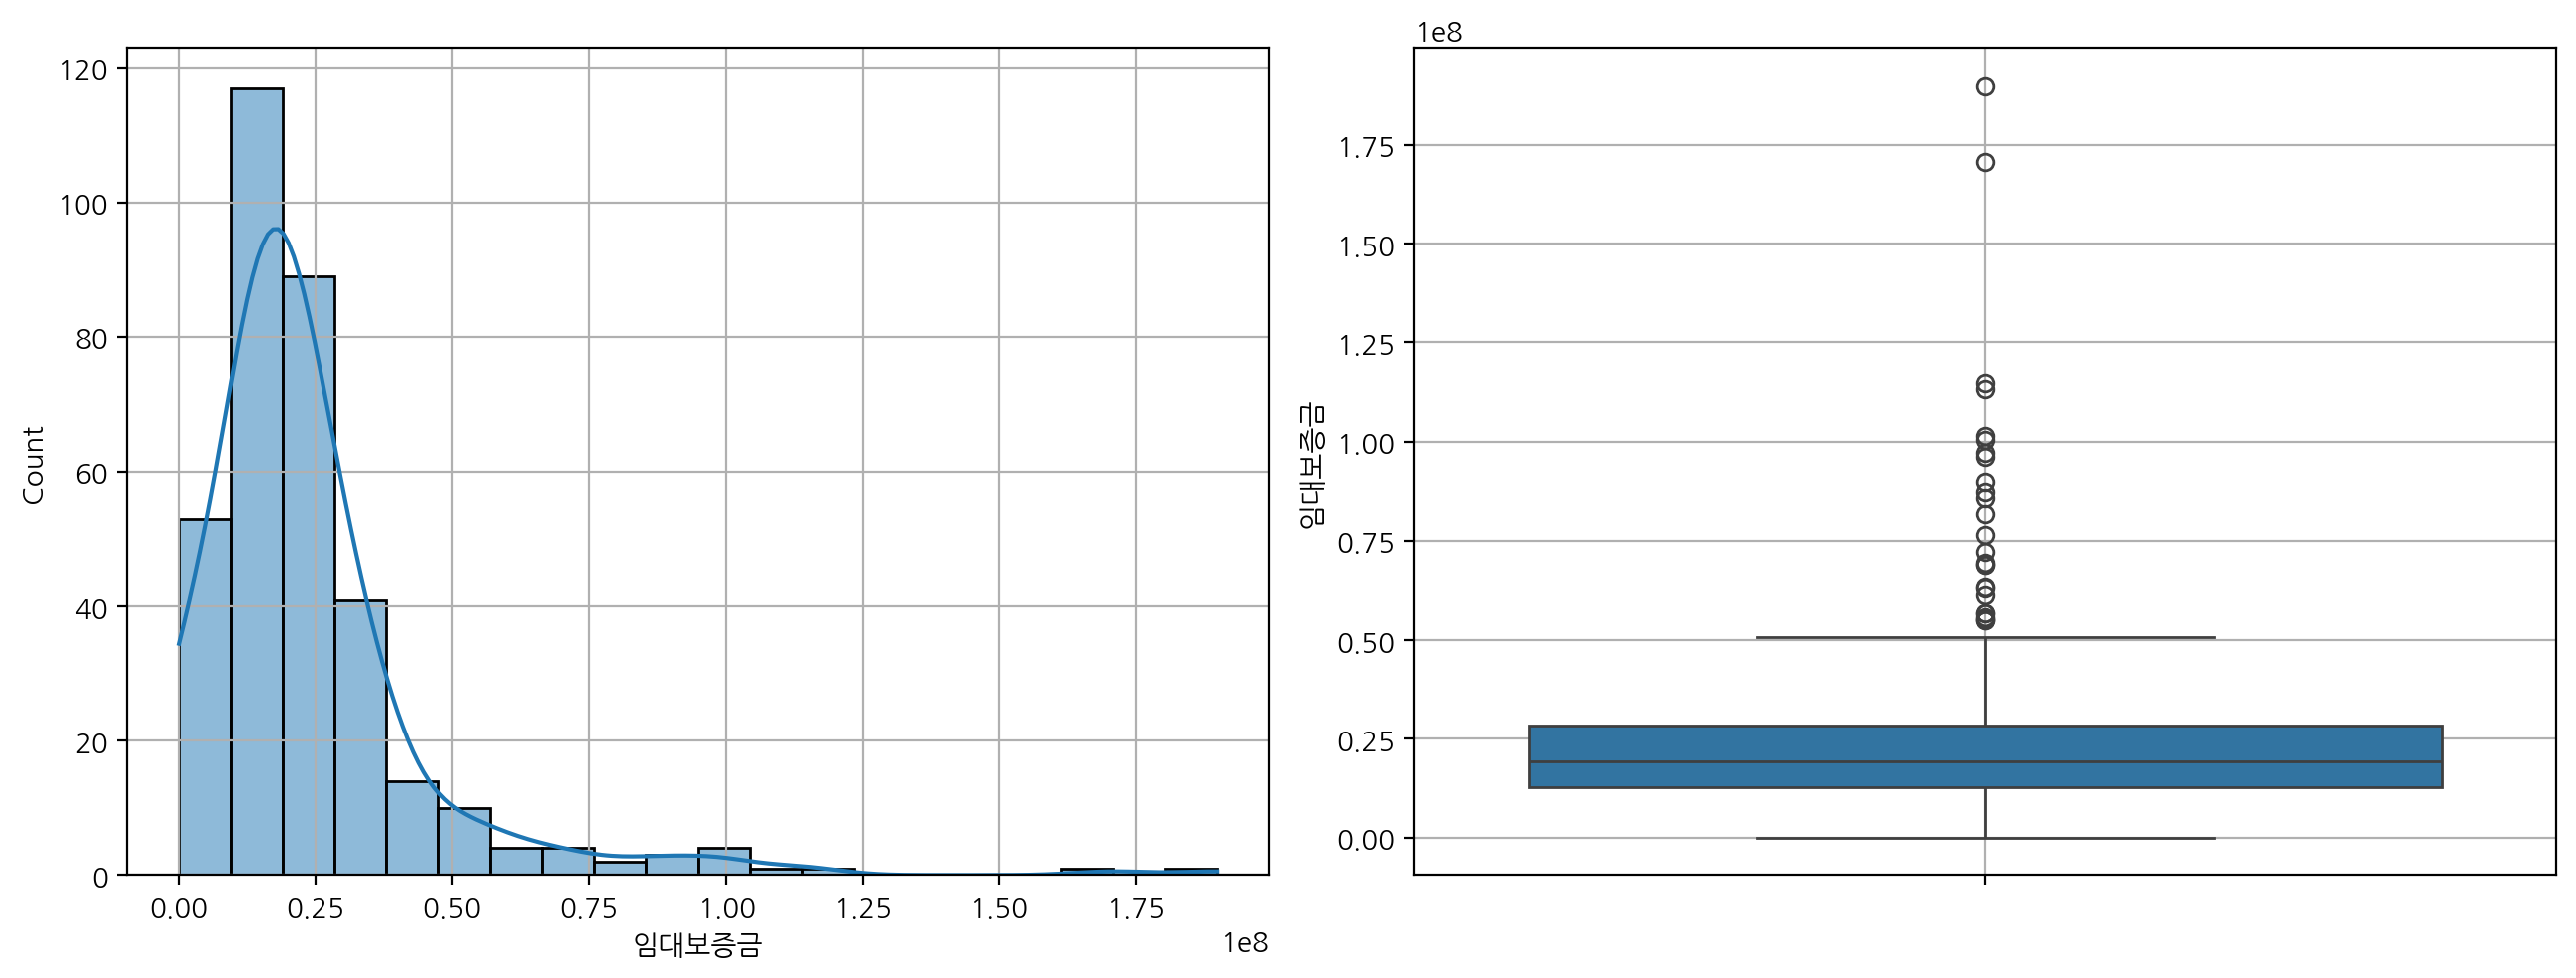

In [38]:
test(apart, '임대보증금')

### (2) 범주형 변수

- 대상: '지역', '건물형태', '난방방식', '승강기설치여부'
- sns.countplot() 함수 등을 사용해 데이터 분포를 확인합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [40]:
# 함수 만들기
def test1(data, col_name) :
    sns.countplot(x = col_name, data = data)
    plt.grid()
    plt.show()


#### 1) 지역

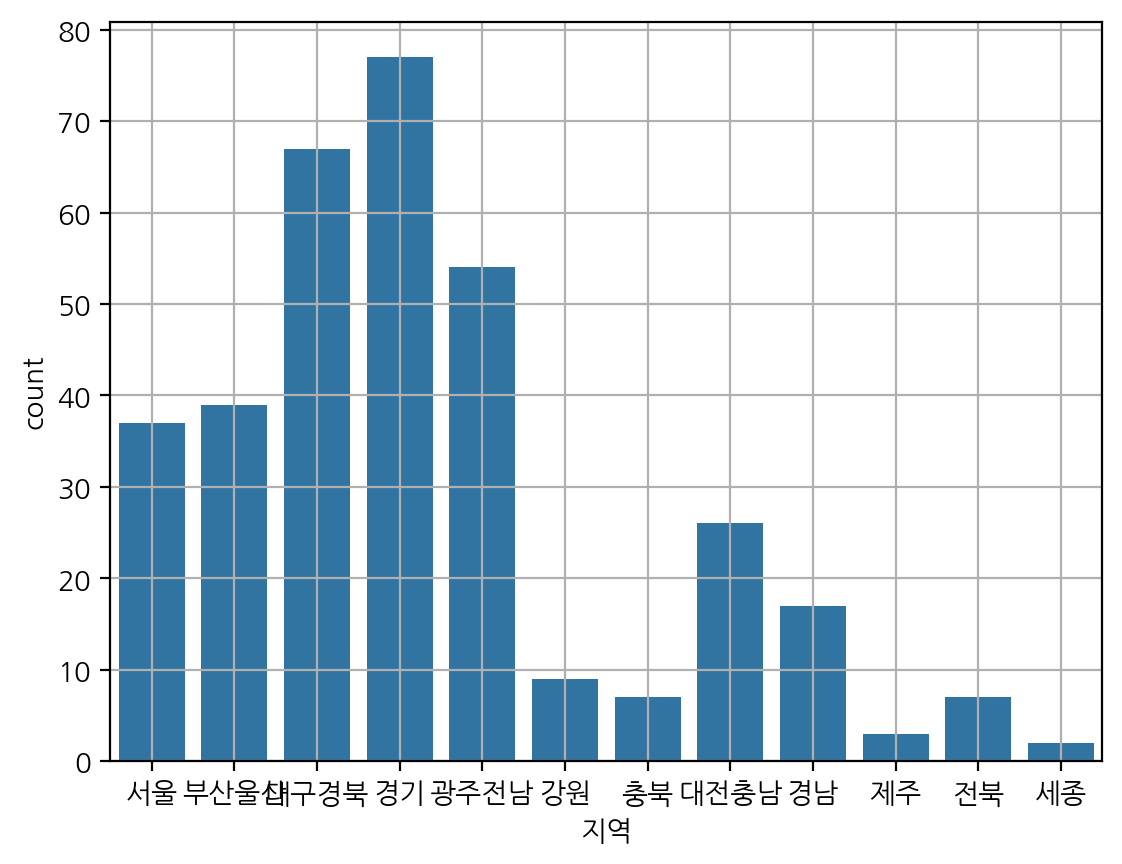

In [42]:
test1(apart, '지역')

#### 2) 건물형태

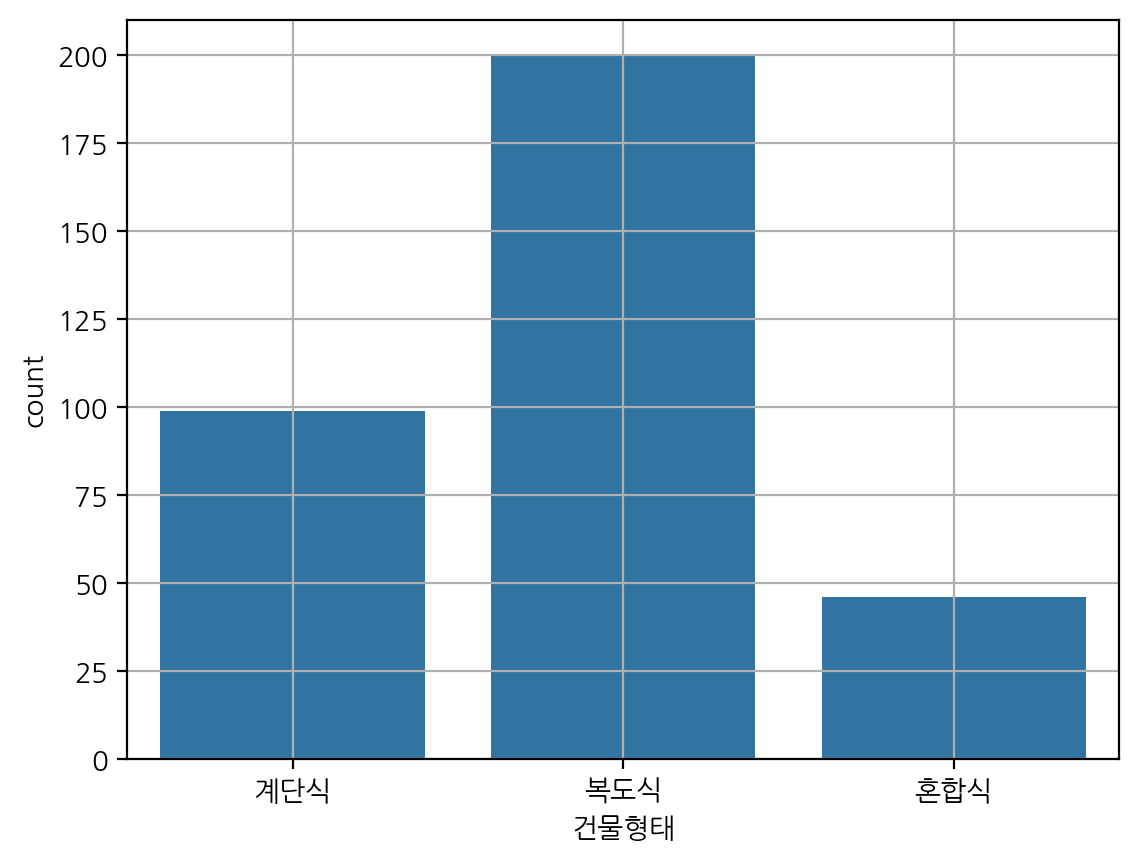

In [44]:
test1(apart, '건물형태')

#### 3) 난방방식

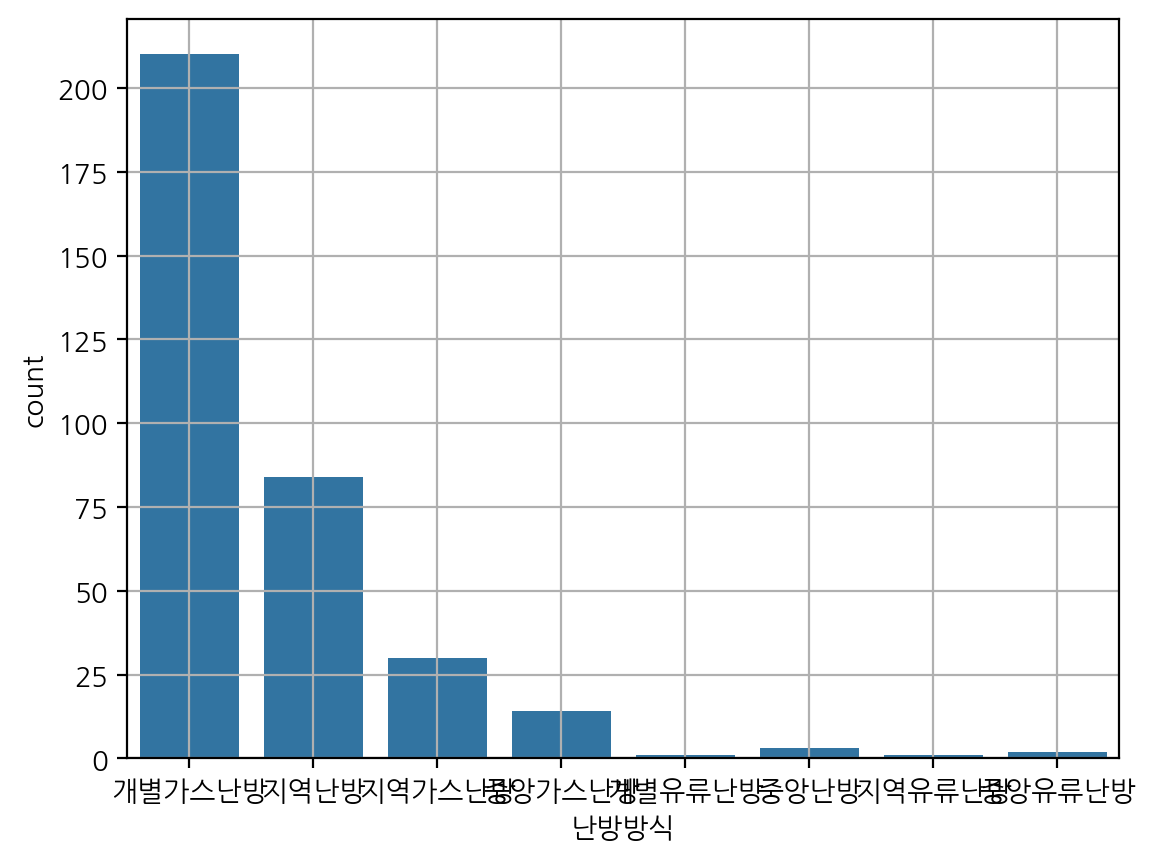

In [46]:
test1(apart, '난방방식')

#### 4) 승강기설치여부

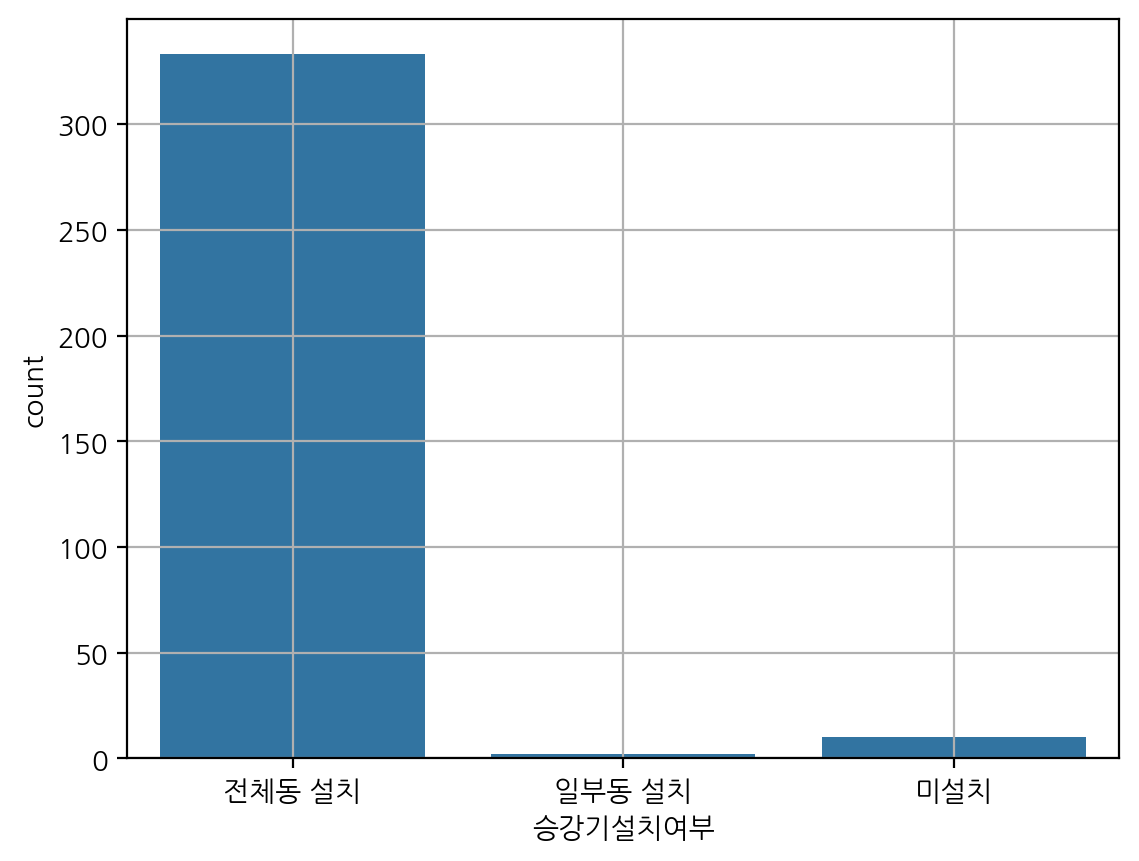

In [48]:
test1(apart, '승강기설치여부')

#### 5) 전용면적구간

- 전용면적구간은 pd.melt() 함수를 사용해 pivot을 해제하여 전용면적구간별 세대수를 분석합니다.

In [144]:
df_melted = pd.melt(apart, 
                    id_vars=['총세대수', '준공연도', '실차량수', '총면적', '임대보증금', '임대료'],  # 고정할 열들
                    value_vars=['10-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-200'],  # 변환할 열들
                    var_name='전용면적구간',  # 새로 생성될 열 이름 (변수) / variable
                    value_name='세대수') # value

df_melted

,총세대수,준공연도,실차량수,총면적,임대보증금,임대료,전용면적구간,세대수
0,78,2013,109,6023.7683,5.696200e+07,642930.000000,10-30,0
1,35,2013,35,1569.1668,6.306200e+07,470100.000000,10-30,35
2,88,2013,88,7180.1396,7.219000e+07,586540.000000,10-30,0
3,477,2014,943,47058.9273,1.015167e+08,950305.000000,10-30,0
4,15,2013,21,543.0268,5.522750e+07,340148.333333,10-30,15
...,...,...,...,...,...,...,...,...
2410,1485,1993,298,64622.2500,7.595571e+06,104975.714286,80-200,0
2411,1386,1993,258,57616.8100,8.092875e+06,111848.750000,80-200,0
2412,956,1994,243,37398.7200,9.931000e+06,134540.000000,80-200,0
2413,120,2020,47,5581.8024,2.515500e+06,50040.000000,80-200,0


## 4. 이변량 분석

- 숫자형 변수들 간의 상관관계를 분석합니다.
- 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
- 볌주형 변수 → 실차량수 관계를 분석합니다.

### (1) 숫자형 변수들 간의 상관관계

- 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
- 숫자형 변수들 간의 상관관계를 df.corr() 메서드와 sns.heatmap() 함수 등을 사용해 시각화 합니다.

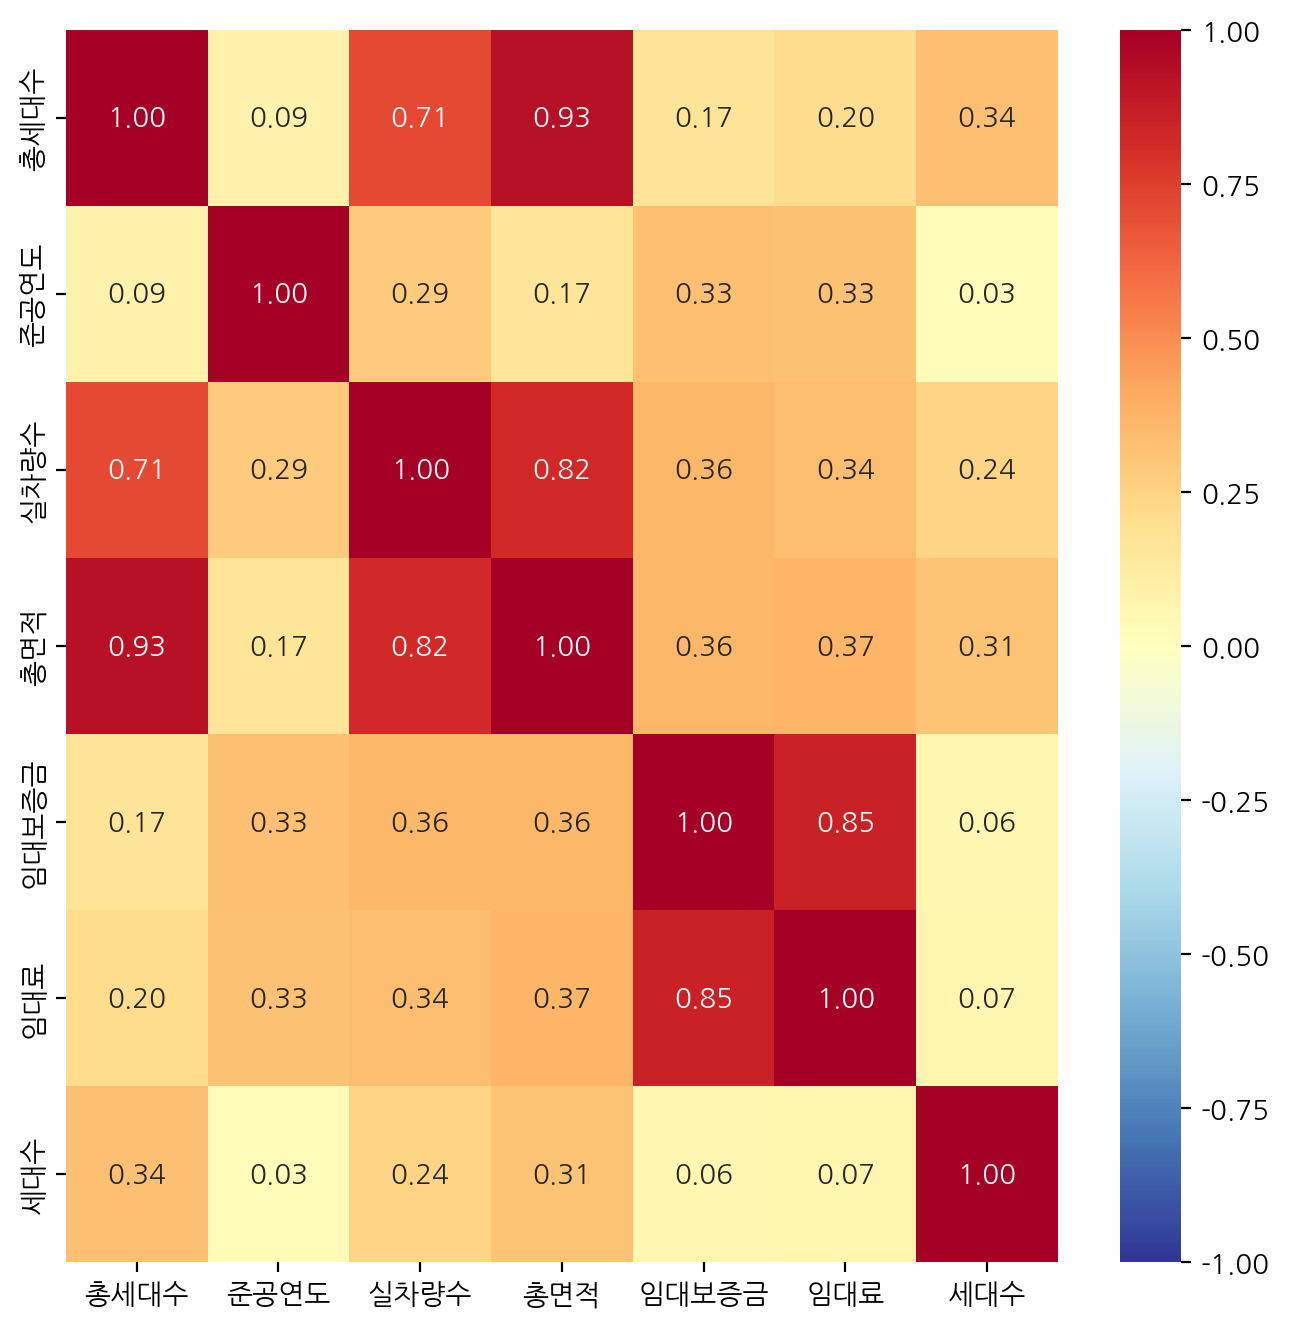

In [53]:
plt.figure(figsize = (8, 8))
sns.heatmap(df_melted.corr(numeric_only=True), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.2f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값
plt.show()

### (2) 숫자형 변수 → 실차량수

- 상관계수가 높은 상위 3~5개 숫자형 변수와 실차량수 관계를 산점도를 시각화해 분석합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [55]:
# 함수 만들기
def num_num_analysis(data, col_name) :
    print('상관계수 : ', spst.pearsonr(data[col_name], data['실차량수'])[0])
    print('p-value : ', spst.pearsonr(data[col_name], data['실차량수'])[1])
    sns.regplot(x=col_name, y='실차량수', data = data)
    plt.grid()
    plt.show()

#### 1) 총세대수

상관계수 :  0.7124746462088557
p-value :  1.0221045732952228e-54


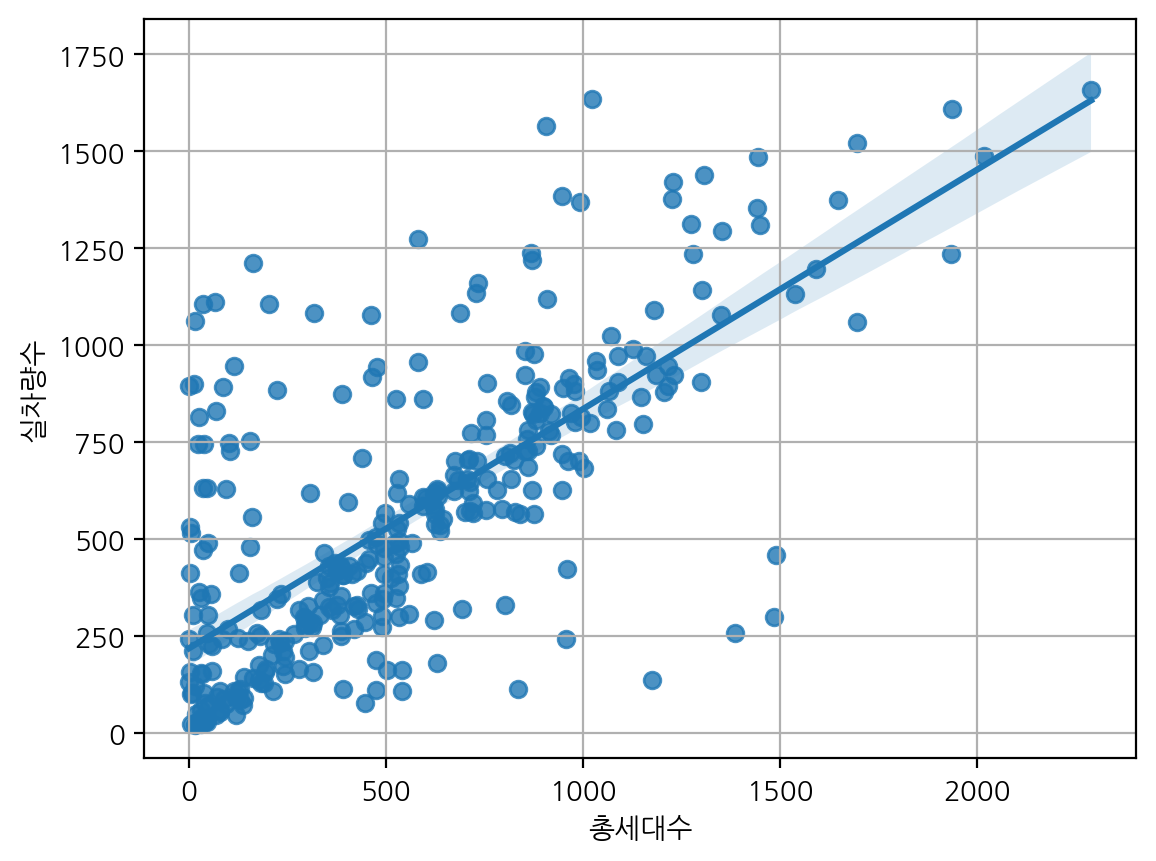

In [57]:
num_num_analysis(apart, '총세대수')

#### 2) 총면적

상관계수 :  0.8221825549027681
p-value :  6.032798759323943e-86


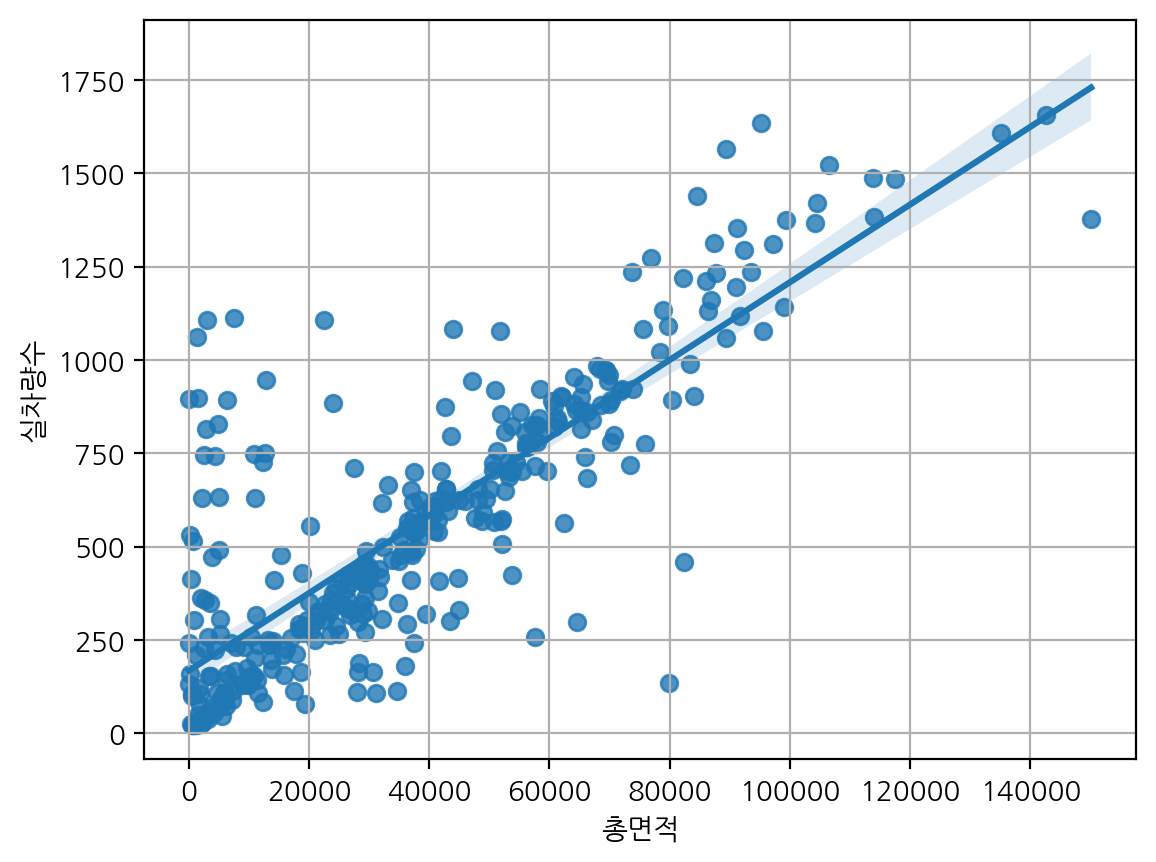

In [59]:
num_num_analysis(apart, '총면적')

### (3) 범주형 변수 → 실차량수

- 범주형 변수 → 실차량수 관계를 분석합니다.
- 대상: '지역', '준공연도', '건물형태', '난방방식', '승강기설치여부'
- 범줏값 별 실차량수 평균을 막대그래프로 시각화해 분석합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [64]:
# 함수 만들기
def categorical_num_analysis(data, col_name) :
    # print('상관계수 : ', spst.pearsonr(data[col_name], data['실차량수'])[0])
    # print('p-value : ', spst.pearsonr(data[col_name], data['실차량수'])[1])
    sns.barplot(x=col_name, y = '실차량수', data = data)
    plt.xticks(rotation = 45)
    plt.grid()
    plt.show()


#### 1) 지역

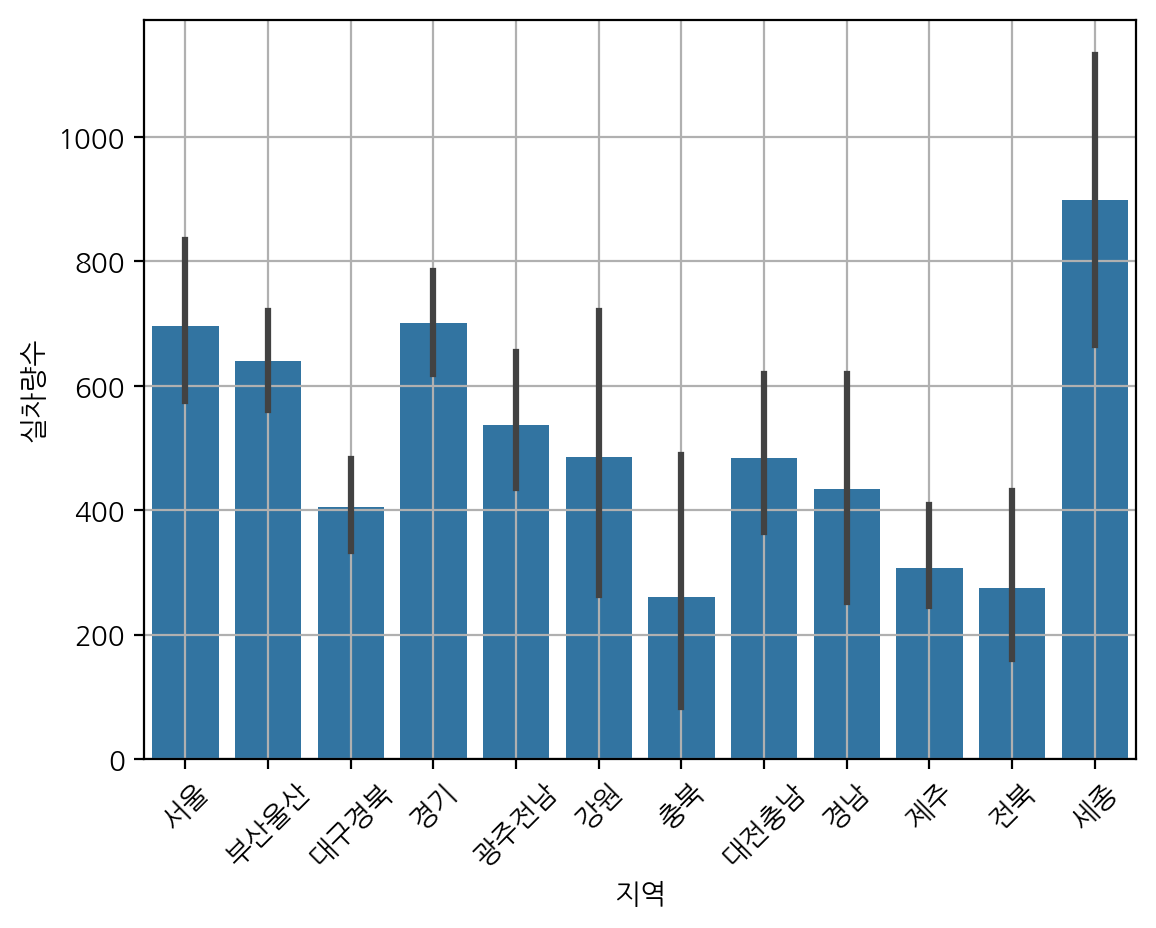

In [66]:
categorical_num_analysis(apart, '지역')

#### 2) 준공연도

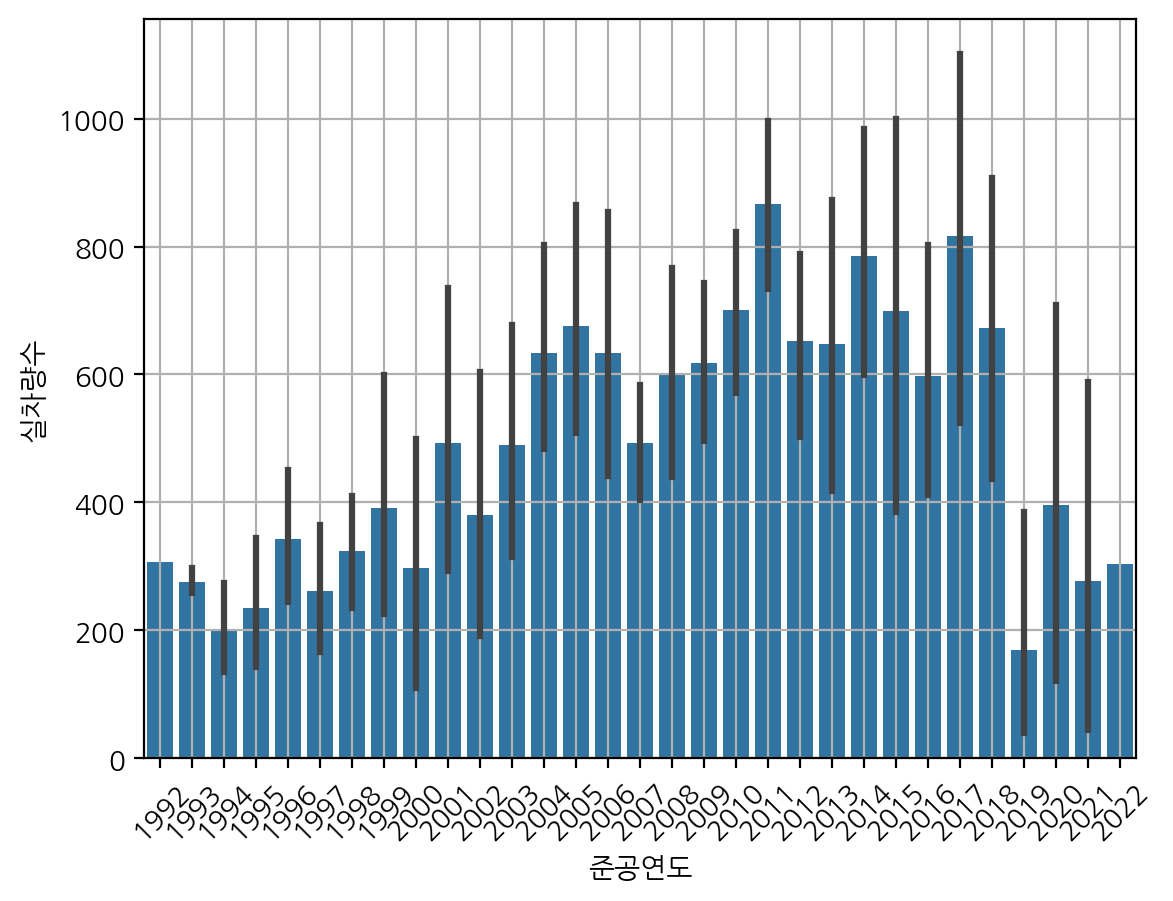

In [68]:
categorical_num_analysis(apart, '준공연도')

#### 3) 건물형태

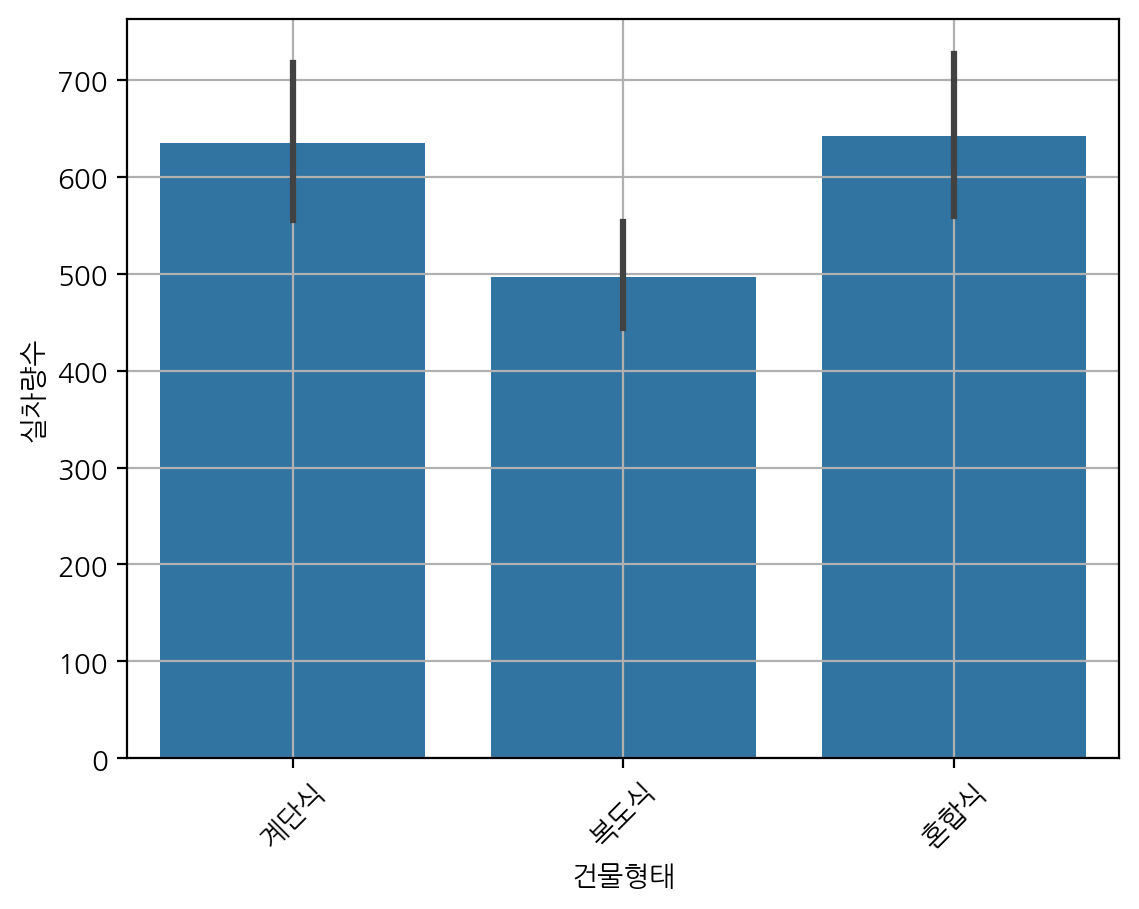

In [70]:
categorical_num_analysis(apart, '건물형태')

#### 4) 난방방식

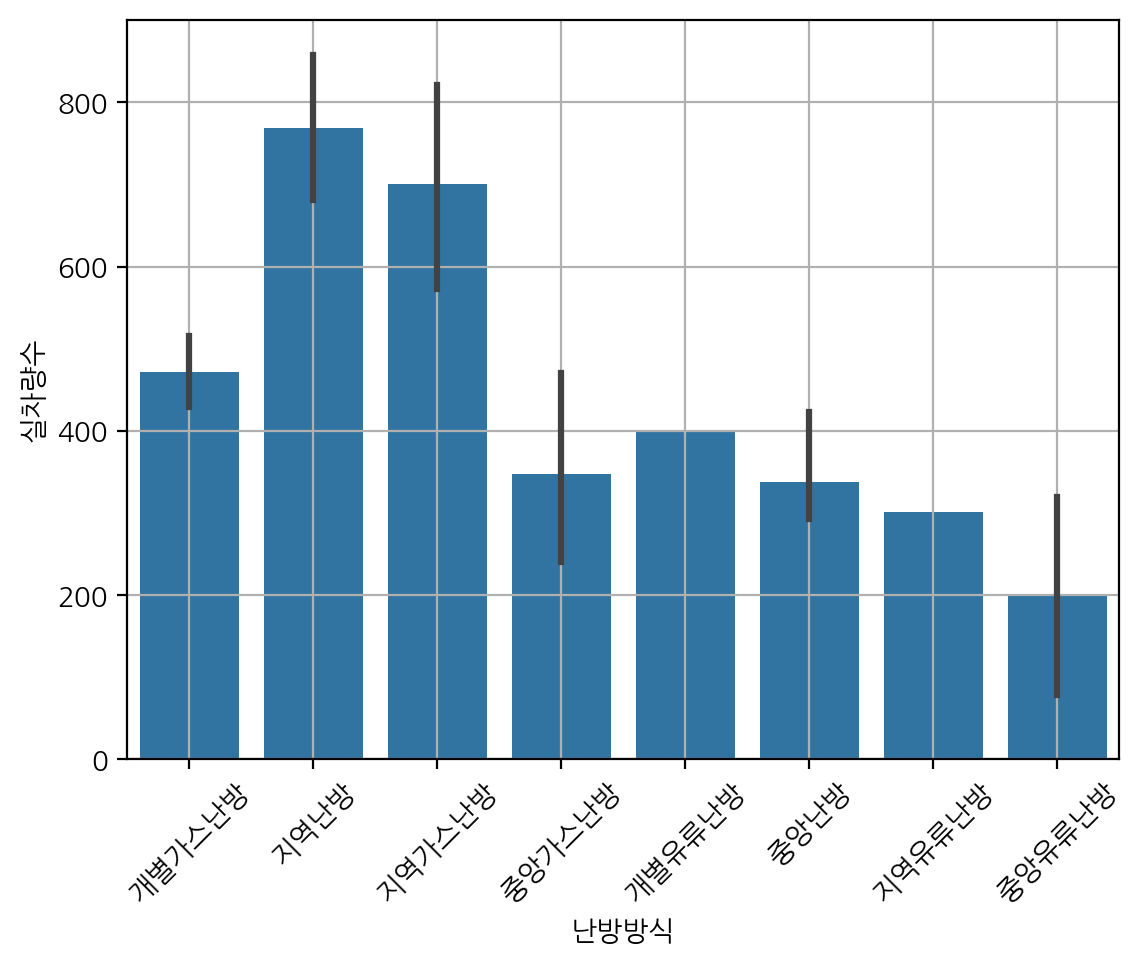

In [72]:
categorical_num_analysis(apart, '난방방식')

#### 5) 승강기설치여부

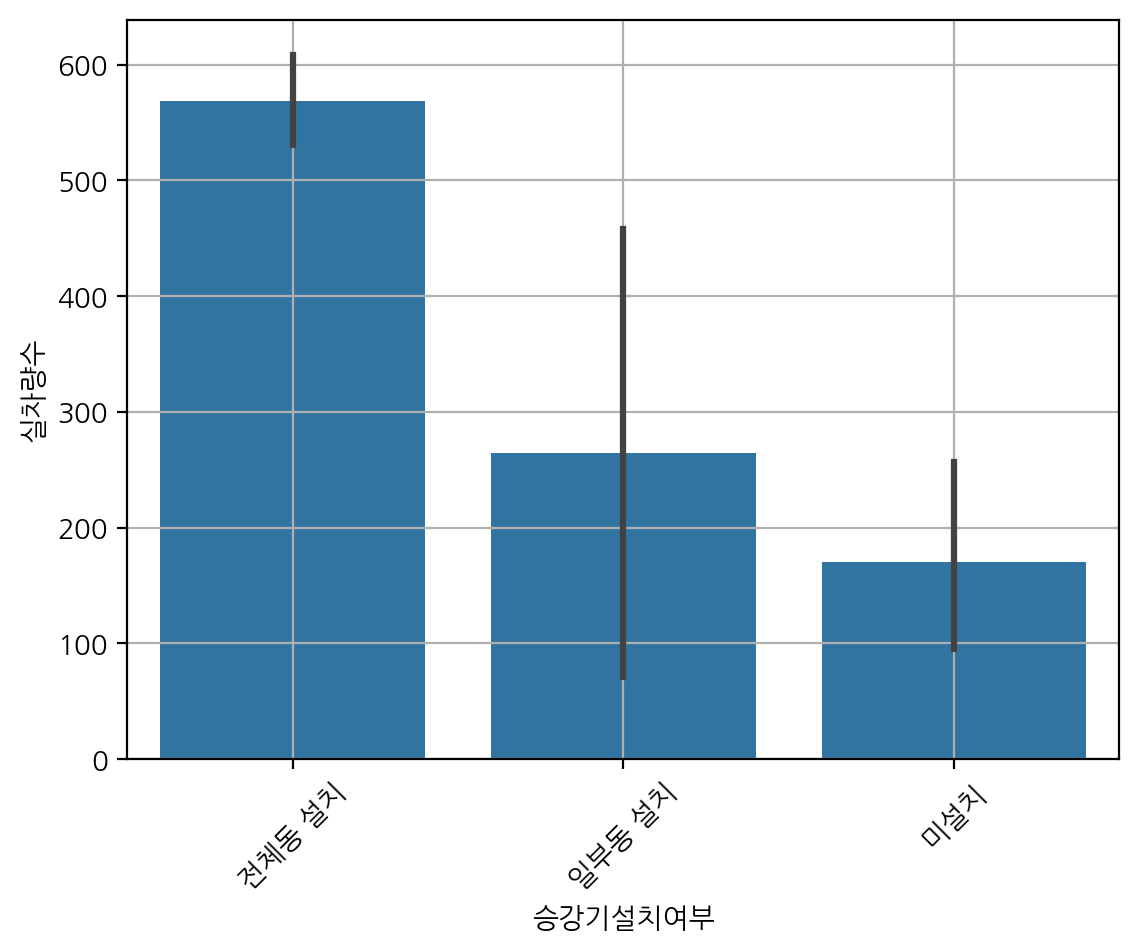

In [74]:
categorical_num_analysis(apart, '승강기설치여부')

## 5. 추가 전처리

- '난방방식', '승강기설치여부' 두 변수에 대해서 적은 수의 범주로 묶는 작업을 진행합니다.
- '단지코드'는 개별적인 값이므로 예측과 관련이 없으니 제거합니다.
- '지역' 변수는 지역별 특성을 고려하기에는 너무 세분화 되어 있고, 특징으로 통합하기 어려우므로 제거합니다.

### (1) 난방방식

- '난방방식' 변수의 값을 다음과 같이 변경하여 세 개의 범줏값만 갖게 합니다.
    - 개별가스난방 → 개별
    - 개별유류난방 → 개별
    - 지역난방 → 지역
    - 지역가스난방 → 지역
    - 지역유류난방 → 지역
    - 중앙가스난방 → 중앙
    - 중앙난방 → 중앙
    - 중앙유류난방 → 중앙

In [77]:
apart['난방방식'].value_counts()

난방방식
개별가스난방    210
지역난방       84
지역가스난방     30
중앙가스난방     14
중앙난방        3
중앙유류난방      2
개별유류난방      1
지역유류난방      1
Name: count, dtype: int64

In [78]:
apart['난방방식'] = apart['난방방식'].replace({'개별가스난방': '개별', '개별유류난방': '개별', 
                               '지역난방': '지역', '지역가스난방' : '지역', '지역유류난방' : '지역',
                               '중앙가스난방' : '중앙', '중앙난방' : '중앙', '중앙유류난방' : '중앙'})

apart['난방방식'].value_counts()

난방방식
개별    211
지역    115
중앙     19
Name: count, dtype: int64

### (2) 승강기설치여부

- '승강기설치여부' 변수의 값을 다음과 같이 변경하여 0, 1 값을 갖게 합니다.
    - 전체동 설치 → 1
    - 일부동 설치 → 0
    - 미설치 → 0

In [80]:
apart['승강기설치여부'] = apart['승강기설치여부'].replace({'전체동 설치': 1, '일부동 설치': 0, '미설치': 0})

apart['승강기설치여부'].value_counts()

승강기설치여부
1    333
0     12
Name: count, dtype: int64

### (3) 단지코드, 지역 제거

- '단지코드', '지역' 변수를 제거합니다.

In [82]:
apart.columns

Index(['단지코드', '총세대수', '지역', '준공연도', '건물형태', '난방방식', '승강기설치여부', '실차량수', '총면적',
       '10-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-200', '임대보증금',
       '임대료'],
      dtype='object')

In [83]:
drop_cols = ['단지코드', '지역']

apart = apart.drop(columns=drop_cols)
apart

,총세대수,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,10-30,30-40,40-50,50-60,60-70,70-80,80-200,임대보증금,임대료
0,78,2013,계단식,개별,1,109,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,35,2013,복도식,개별,1,35,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,88,2013,계단식,개별,1,88,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,477,2014,복도식,지역,1,943,47058.9273,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,15,2013,복도식,개별,1,21,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,1485,1993,복도식,중앙,1,298,64622.2500,1181,298,0,6,0,0,0,7.595571e+06,104975.714286
341,1386,1993,복도식,중앙,1,258,57616.8100,1071,298,0,17,0,0,0,8.092875e+06,111848.750000
342,956,1994,복도식,지역,1,243,37398.7200,956,0,0,0,0,0,0,9.931000e+06,134540.000000
343,120,2020,복도식,개별,1,47,5581.8024,66,54,0,0,0,0,0,2.515500e+06,50040.000000


- 최종 데이터를 확인합니다.

## 6. 데이터 셋 저장

- joblib.dump() 함수를 사용하여 최종 데이터 셋을 파일로 저장합니다.
- 파일 이름은 base_data2.pkl로 합니다.

In [86]:
# 파일로 저장
joblib.dump(apart, path+'base_data2.pkl')

['base_data2.pkl']